In [48]:
# import the required modules

In [49]:
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [50]:
# download dataset from kaggle and load to pandas data frame

In [51]:
liver = pd.read_csv("indian_liver_patient.csv")

In [52]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [53]:
# data preparation and cleaning

In [54]:
# let check the dimensions of the dataframe

In [55]:
liver.shape

(583, 11)

In [56]:
# let check the missing  values in the dataframe

In [57]:
round(100*(liver.isnull().sum()/len(liver.index)),2)

Age                           0.00
Gender                        0.00
Total_Bilirubin               0.00
Direct_Bilirubin              0.00
Alkaline_Phosphotase          0.00
Alamine_Aminotransferase      0.00
Aspartate_Aminotransferase    0.00
Total_Protiens                0.00
Albumin                       0.00
Albumin_and_Globulin_Ratio    0.69
Dataset                       0.00
dtype: float64

In [58]:
# only Albumin_and_Globulin_Ratio has some missing values.
# let drop the NAN values

In [59]:
liver.dropna(inplace=True)

In [60]:
liver.shape

(579, 11)

In [61]:
liver['Gender'] = liver.Gender.map({'Female':2,'Male':1})

In [62]:
# putting  feature variable to x

In [63]:
x = liver.drop('Dataset',axis=1)

In [64]:
# putting  response variable to y

In [65]:
y = liver['Dataset']

In [66]:
# rescaling and split the data set into test and train 

In [67]:
x_std  = StandardScaler().fit_transform(x)

In [68]:
# Splitting the data into train and test

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_std,y,test_size=0.30,random_state=100)

In [70]:
neighbors = [x for x in list(range(1,100)) if x % 2==0]

In [71]:
cv_scores = []

In [72]:
# perfrom 10-fold cross validation on training set for odd values of k:

In [73]:
seed = 123

In [74]:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value,weights='uniform',p=2,metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn,x_train,y_train,cv=kfold,scoring='accuracy')
    cv_scores.append(scores.mean()*100)

In [75]:
optimal_k = neighbors[cv_scores.index(max(cv_scores))]

In [76]:
print(optimal_k)

56


In [77]:
# print(("The optimum number of neighbors is %d with %0.1f%%"%(optimal_k,cv_scores[optimal_k])))

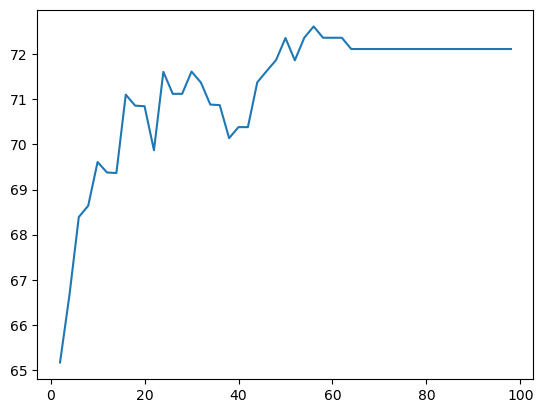

In [78]:
plt.plot(neighbors,cv_scores)

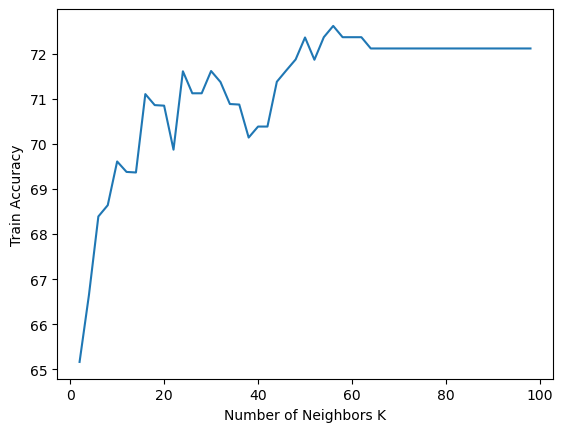

In [79]:
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show(plt.plot(neighbors,cv_scores))

In [80]:
# model building

In [81]:
knn = KNeighborsClassifier(n_neighbors = 56)

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=56)

In [83]:
y_pred = knn.predict(x_test)

In [84]:
acc_train = round(knn.score(x_train,y_train)*100,2)
acc_val = round(knn.score(x_test,y_test)*100,2)
print("Accuracy of training dataset:"+str(acc_train))
print("Accuracy of test dataset:"+str(acc_val))

Accuracy of training dataset:72.84
Accuracy of test dataset:70.69


In [85]:
# At neighbors 56, the accuracy of prediction of liver disease from  KNN is 70.69